<a href="https://colab.research.google.com/github/fansha1994/DS-Unit-4-Sprint-1-NLP/blob/main/module2-vector-representations/LS_DS18_422_BOW_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [3]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
# Dependencies for the week (instead of conda)
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
!pip install -r requirements.txt

--2020-10-02 01:32:14--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]     137  --.-KB/s    in 0s      

2020-10-02 01:32:15 (8.22 MB/s) - ‘requirements.txt’ saved [137/137]

     |████████████████████████████████| 24.2MB 4.1MB/s 
     |████████████████████████████████| 1.6MB 58.3MB/s 
     |████████████████████████████████| 10.4MB 37.3MB/s 
     |████████████████████████████████| 7.1MB 56.3MB/s 
     |████████████████████████████████| 215kB 57.0MB/s 
     |████████████████████████████████| 2.2MB 48.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.w

In [3]:
!python -m spacy download en_core_web_lg  # Can do lg, takes awhile
# Also on Colab, need to restart runtime after this step!

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=cdeb7280db1b7cc740accdfb1b1249fedd2f09d59bfe5b372e59e8d7cad40253
  Stored in directory: /tmp/pip-ephem-wheel-cache-hjjc1f8d/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [4]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module2-vector-representations/data/job_listings.csv"

job_listings = pd.read_csv(url)
print(job_listings.shape)
job_listings.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [5]:
text = job_listings['description'][0]

In [6]:
cleantext = BeautifulSoup(text, 'html.parser').text
print(cleantext)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [7]:
job_listings['clean_description'] = [BeautifulSoup(clean_description, 'html.parser').text for clean_description in job_listings['description']] 
job_listings.head()

,Unnamed: 0,description,title,clean_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [8]:
job_listings['clean_description'][0]

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [9]:
job_listings['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [10]:
text2 = job_listings['clean_description'][0]

In [11]:
text2 = re.sub("[^a-zA-Z.,!?']+"," ", text2)
text2

"b Job Requirements nConceptual understanding in Machine Learning models like Nai xc xa ve Bayes, K Means, SVM, Apriori, Linear Logistic Regression, Neural, Random Forests, Decision Trees, K NN along with hands on experience in at least of them nIntermediate to expert level coding skills in Python R. Ability to write functions, clean and efficient data manipulation are mandatory for this role nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot , dplyr, tidyR in R nAbility to communicate Model findings to both Technical and Non Technical stake holders nHands on experience in SQL Hive or similar programming language nMust show past work via GitHub, Kaggle or any other published article nMaster's degree in Statistics Mathematics Computer Science or any other quant specific field. nApply Now "

In [12]:
job_listings['clean_description'] = job_listings['clean_description'].apply(lambda x: re.sub("[^a-zA-Z.,!?']+"," ", x))
job_listings.head()

,Unnamed: 0,description,title,clean_description
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,b Job Requirements nConceptual understanding i...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description n nAs a Data Scientist , you..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b' , , a monthContractUnder the general superv..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location USA xe x x multiple locations n yea...


In [19]:
job_listings.columns

Index(['Unnamed: 0', 'description', 'title', 'clean_description', 'tokens'], dtype='object')

In [20]:
job_listings = job_listings.drop('Unnamed: 0', axis=1)

## 2) Use Spacy to tokenize the listings 

In [21]:
job_listings.isnull().sum()

description          0
title                0
clean_description    0
tokens               0
dtype: int64

In [22]:
# we will tokenize using spacy
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")


In [23]:
 for doc in nlp.pipe(job_listings['clean_description'][:10]):
  print(doc)

b Job Requirements nConceptual understanding in Machine Learning models like Nai xc xa ve Bayes, K Means, SVM, Apriori, Linear Logistic Regression, Neural, Random Forests, Decision Trees, K NN along with hands on experience in at least of them nIntermediate to expert level coding skills in Python R. Ability to write functions, clean and efficient data manipulation are mandatory for this role nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot , dplyr, tidyR in R nAbility to communicate Model findings to both Technical and Non Technical stake holders nHands on experience in SQL Hive or similar programming language nMust show past work via GitHub, Kaggle or any other published article nMaster's degree in Statistics Mathematics Computer Science or any other quant specific field. nApply Now 
b'Job Description n nAs a Data Scientist , you will help us build machine learning models, data pipelines, and micro services to help our clients navigate their healthca

In [16]:
tokens = []

for doc in nlp.pipe(job_listings['clean_description']):

  doc_tokens = []

  for token in doc:

    if (token.is_stop == False) & (token.is_punct ==False) & (token.pos_ != 'PRON'):
      doc_tokens.append(token.text.lower())

  tokens.append(doc_tokens)

# adding a new column
job_listings['tokens'] = tokens

In [17]:
job_listings.head()

,Unnamed: 0,description,title,clean_description,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,b Job Requirements nConceptual understanding i...,"[b, job, requirements, nconceptual, understand..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description n nAs a Data Scientist , you...","[b'job, description, n, nas, data, scientist, ..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...,"[b'as, data, scientist, working, consulting, b..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b' , , a monthContractUnder the general superv...","[b, monthcontractunder, general, supervision, ..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location USA xe x x multiple locations n yea...,"[b'location, usa, xe, x, x, multiple, location..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [35]:
# Apply CountVectorizer to our Data
# Use custom Spacy Vectorizer
# BBC articles in `data` variable

from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(stop_words='english', max_features=2000)

#Learn our Vocab
vect.fit(job_listings['clean_description'])

# Get sparse dtm
dtm = vect.transform(job_listings['clean_description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

In [30]:
dtm.head()

,aa,ab,abilities,ability,able,academic,accelerate,accept,access,accessible,accommodation,accommodations,accomplish,accordance,according,account,accountability,accounts,accredited,accuracy,accurate,achieve,achieving,acquire,acquisition,act,action,actionable,actions,active,actively,activities,activity,actuarial,acumen,ad,add,addition,additional,address,...,ways,web,website,week,weeks,welcome,wellness,wide,wider,willing,willingness,win,women,word,work,worked,workers,workflows,workforce,working,workplace,works,world,worldwide,wrangling,write,writing,written,www,xa,xae,xb,xbb,xc,xe,xef,year,years,york,zf
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,2,0,0,2,0,0,0,2,1,0,2,0,0,0,0,8,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## 4) Visualize the most common word counts

In [31]:
doc_len = [len(doc) for doc in job_listings['clean_description']]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


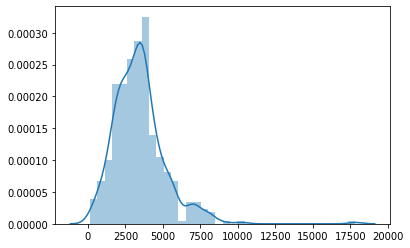

In [32]:
import seaborn as sns

sns.distplot(doc_len);

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get word counts per document
# Similiar to fit_predict
dtm = tfidf.fit_transform(job_listings['clean_description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,aa,ab,abernathy,abilities,ability,able,absence,absolutely,abstract,abundant,academic,academics,accelerate,accelerating,accept,accepted,accepting,access,accessibility,accessible,accommodate,accommodation,accommodations,accomplish,accomplished,accomplishment,accordance,according,account,accountability,accountable,accounting,accounts,accredited,accuracy,accurate,accurately,achieve,achieving,acquire,...,world,worldline,worldwide,worth,wrangle,wrangler,wrangling,write,writing,written,wwe,www,xa,xac,xae,xb,xbb,xbox,xc,xe,xef,xgboost,xpo,year,yeara,yearcollects,yeardescription,years,yearsummary,yearthe,yes,yeti,york,young,yrs,zenreach,zero,zeus,zf,zillow
0,0.0,0.0,0.0,0.0,0.061108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.122407,0.000000,0.000000,0.0,0.0,0.112578,0.0,0.0,0.0,0.0,0.0,0.131572,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.025199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.062549,0.0,0.0,0.0,0.0,0.0,0.0,0.045088,0.0,0.0,0.0,0.0,0.0,...,0.046912,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.085507,0.030379,0.0,0.0,0.092847,0.0,0.0,0.0,0.0,0.0,0.000000,0.142399,0.0,0.0,0.0,0.041474,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.058882,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.089897,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.097518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [38]:
# Tunning Parameters

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english', 
                        ngram_range=(1,2),
                        max_df=.97,
                        min_df=3,
                        tokenizer=tokenize)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(job_listings['clean_description']) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,.js,aa,aa employer,ab,ab test,abilitie,abilitie nproblem,ability,ability analyze,ability apply,ability build,ability clearly,ability collaborate,ability communicate,ability conduct,ability create,ability deliver,ability develop,ability devise,ability drive,ability effectively,ability experience,ability explain,ability insight,ability juggle,ability lead,ability manage,ability perspective,ability present,ability require,ability research,ability resolve,ability solve,ability support,ability synthesize,ability thing,ability think,ability transform,ability translate,ability use,...,xbb experience,xbb familiarity,xbb strong,xbb utilize,xc,xc xa,xc xae,xc xbb,xe,xe x,xef,xef x,xgboost,y,y combinator,year,year analytical,year apply,year come,year data,year datum,year experience,year hand,year industry,year n,year nrequirements,year professional,year real,year related,year relevant,year simple,year technical,year work,year xe,yearthe,yes,york,york city,york office,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043784,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.097901,0.134477,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019369,0.0,0.0,0.0,0.0,0.0,0.046787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.113668,0.113668,0.0,0.0,0.0,0.0,0.0,0.014243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.024014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.066448,0.066448,0.0,0.0,0.0,0.0,0.0,0.066610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
dtm.shape

(426, 12552)

## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [40]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [41]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 1.31484188, 1.32830204, 1.33131178, 1.33362967]]),
 array([[  0, 115, 274, 336, 403]]))

In [42]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[256]])

(array([[0.        , 1.20081944, 1.24137639, 1.24137639, 1.26172471]]),
 array([[256, 199, 122,  55, 201]]))

In [44]:
job_listings['clean_description'][256][:199]

"b'Role Summary nThe CCS Data Scientist is responsible for supporting the CCS digital service operations teams with data analytics that drive improved remote service efficiency and improved customer e"

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 